In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pradmishra1/PublicDatasets/main/monthly_csv.csv',index_col=0)

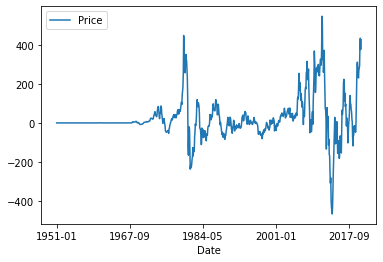

In [4]:
# seasonal difference
differenced = df.diff(12)
# trim off the first year of empty data
differenced = differenced[12:]
# save differenced dataset to file
differenced.to_csv('seasonally_adjusted.csv', index=False)
# plot differenced dataset
differenced.plot()
plt.show()

In [5]:
# reframe as supervised learning
dataframe = pd.DataFrame()
for i in range(12,0,-1):
    dataframe['t-'+str(i)] = df.shift(i).values[:,0]
dataframe['t'] = df.values[:,0]
print(dataframe.head(13))
dataframe = dataframe[13:]
# save to new file
dataframe.to_csv('lags_12months_features.csv', index=False)

     t-12   t-11   t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3  \
0     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  34.73   
4     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  34.73  34.73   
5     NaN    NaN    NaN    NaN    NaN    NaN    NaN  34.73  34.73  34.73   
6     NaN    NaN    NaN    NaN    NaN    NaN  34.73  34.73  34.73  34.73   
7     NaN    NaN    NaN    NaN    NaN  34.73  34.73  34.73  34.73  34.73   
8     NaN    NaN    NaN    NaN  34.73  34.73  34.73  34.73  34.73  34.73   
9     NaN    NaN    NaN  34.73  34.73  34.73  34.73  34.73  34.73  34.73   
10    NaN    NaN  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.73   
11    NaN  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.73  34.73   
12  34.73  3

In [6]:
# split into input and output
df = pd.read_csv('lags_12months_features.csv')
data = df.values
X = data[:,0:-1]
y = data[:,-1]

In [7]:
from sklearn.ensemble import RandomForestRegressor
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

RandomForestRegressor(n_estimators=500, random_state=1)

[0.00122466 0.00188829 0.0020697  0.00365557 0.00567364 0.055976
 0.0158448  0.00888337 0.03130031 0.05304641 0.24696808 0.57346918]


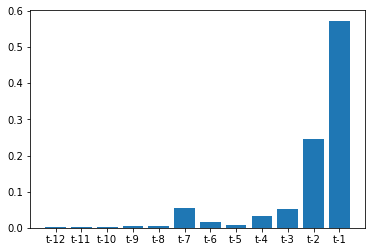

In [8]:
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

In [9]:
from sklearn.feature_selection import RFE

In [10]:
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=4)
fit = rfe.fit(X, y)


In [11]:
# report selected features
print('Selected Features:')
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

Selected Features:
t-7
t-3
t-2
t-1


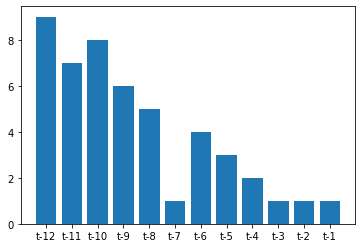

In [12]:
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.bar(ticks, fit.ranking_)
plt.xticks(ticks, names)
plt.show()

In [13]:
data = pd.read_csv('lags_12months_features.csv')

In [15]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [16]:
import shap
X = data[['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']]
y = data['t']
from sklearn.linear_model import LinearRegression
new_model = LinearRegression()
new_model.fit(X,y)


LinearRegression()

In [17]:
!pip install Lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for Lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=1e44173020432a50b3b64f74ae79f99d506f785c01f5619e003b675399c60665
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built Lime


In [18]:
import lime
import lime.lime_tabular

In [19]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X),
                                                   mode='regression',
                                                  feature_names=X.columns,
                                                  class_names=['t'],
                                                  verbose=True)

In [20]:
explainer.feature_frequencies

{0: array([0.25659472, 0.24340528, 0.24940048, 0.25059952]),
 1: array([0.25539568, 0.24460432, 0.24940048, 0.25059952]),
 2: array([0.25419664, 0.24580336, 0.24940048, 0.25059952]),
 3: array([0.2529976 , 0.2470024 , 0.24940048, 0.25059952]),
 4: array([0.25179856, 0.24820144, 0.24940048, 0.25059952]),
 5: array([0.25059952, 0.24940048, 0.24940048, 0.25059952]),
 6: array([0.2529976 , 0.2470024 , 0.24940048, 0.25059952]),
 7: array([0.25179856, 0.24820144, 0.24940048, 0.25059952]),
 8: array([0.25059952, 0.24940048, 0.24940048, 0.25059952]),
 9: array([0.25059952, 0.24940048, 0.24940048, 0.25059952]),
 10: array([0.25059952, 0.24940048, 0.24940048, 0.25059952]),
 11: array([0.25059952, 0.24940048, 0.24940048, 0.25059952])}

In [21]:
# asking for explanation for LIME model
i = 60
exp = explainer.explain_instance(np.array(X)[i],
                                 new_model.predict, 
                                 num_features=12
                                )


Intercept 524.1907857658252
Prediction_local [76.53408383]
Right: 35.77034850521053


X does not have valid feature names, but LinearRegression was fitted with feature names


In [22]:
exp.show_in_notebook(show_table=True)

In [23]:
exp.as_list()

[('t-1 <= 35.39', -635.1332339969734),
 ('t-2 <= 35.34', 210.66614528187935),
 ('t-5 <= 35.20', -139.067880800616),
 ('t-6 <= 35.20', 116.37720395001742),
 ('t-12 <= 35.19', 90.11939668085971),
 ('t-11 <= 35.19', -78.09554990821964),
 ('t-3 <= 35.25', -74.75587075373902),
 ('t-8 <= 35.19', 63.86565747018194),
 ('t-4 <= 35.20', 49.45398090327778),
 ('t-9 <= 35.19', -49.24830755303888),
 ('t-7 <= 35.19', -41.51328966914635),
 ('t-10 <= 35.19', 39.67504645890767)]

In [26]:
# Code for SP-LIME
import warnings
from lime import submodular_pick

# Remember to convert the dataframe to matrix values
# SP-LIME returns exaplanations on a sample set to provide a non redundant global decision boundary of original model
sp_obj = submodular_pick.SubmodularPick(explainer, np.array(X), 
                                        new_model.predict, 
                                        num_features=12,
                                        num_exps_desired=10)

Requested sample size larger than
                              size of input data. Using all data
X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 524.3963564300501
Prediction_local [155.50858481]
Right: 163.34266749489296


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 191.5516007298066
Prediction_local [1104.04057757]
Right: 907.1131188268836


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 393.3235663143586
Prediction_local [517.77782008]
Right: 379.3135718073949


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 429.7612747381396
Prediction_local [375.41835685]
Right: 354.9336176269002


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 488.76196946805356
Prediction_local [244.28891427]
Right: 43.579813623353616


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 409.4903263828163
Prediction_local [428.83868387]
Right: 444.5912715508749


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 505.85805991386866
Prediction_local [251.48389092]
Right: 357.1815555507086


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 425.3459436260503
Prediction_local [384.50368999]
Right: 411.7425293036961


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 464.82310554796464
Prediction_local [293.33131395]
Right: 321.3624737434353


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 203.62505235591706
Prediction_local [1092.93091622]
Right: 662.4945724229774


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 428.0077690032412
Prediction_local [458.16231863]
Right: 397.69513946210225


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 181.0079546312088
Prediction_local [1128.92555824]
Right: 1642.8449222379356


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 499.26432843135836
Prediction_local [187.29508651]
Right: 145.67298539240534


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 570.1998086755664
Prediction_local [9.09039407]
Right: 35.9688086261213


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 162.70187632374103
Prediction_local [1198.62700149]
Right: 521.386323426773


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 190.19135174387625
Prediction_local [1133.01044585]
Right: 492.73257763269737


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 194.90770926742783
Prediction_local [1100.11257418]
Right: 1646.8897594625903


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 197.26299402048386
Prediction_local [1102.09835858]
Right: 624.3985346033162


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 220.58401685115894
Prediction_local [1035.17854294]
Right: 450.77934085957986


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 554.8238988498799
Prediction_local [64.73227796]
Right: 35.86135565524173


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 547.1584180690694
Prediction_local [76.60734951]
Right: 35.678780476536055


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 200.38839910527102
Prediction_local [1101.30938558]
Right: 1254.7399557553927


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 552.9168097438776
Prediction_local [-3.25253499]
Right: 35.84655043033904


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 522.9557774247324
Prediction_local [113.67648758]
Right: 266.75821127635595


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 512.9469361671663
Prediction_local [147.04676974]
Right: 326.7109618475749


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 225.21287297585562
Prediction_local [1046.33358193]
Right: 1275.6334585970308


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 555.0420587543514
Prediction_local [-19.20406122]
Right: 35.919105046271596


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 198.88110746485148
Prediction_local [1096.04045206]
Right: 1205.480807094661


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.52687190294714
Prediction_local [1108.90009461]
Right: 1159.0225161648307


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 400.440930411651
Prediction_local [496.66094276]
Right: 378.5855048053719


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 521.4978200970597
Prediction_local [155.71564042]
Right: 36.554768803197305


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 564.1469820278705
Prediction_local [28.48921742]
Right: 35.48760487064912


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.992337207999
Prediction_local [1078.41376375]
Right: 684.916009198287


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 194.88568394949158
Prediction_local [1117.64542832]
Right: 1330.4272833945654


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.56892785712643
Prediction_local [1089.68479046]
Right: 1722.0249632250313


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 448.23075837009765
Prediction_local [344.7712974]
Right: 411.32508337410576


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 494.3040880321919
Prediction_local [261.06972296]
Right: 301.56891171722714


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 444.63005982705437
Prediction_local [335.07700048]
Right: 452.0908158999392


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 455.6383243529537
Prediction_local [359.09196068]
Right: 365.71228892520026


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 536.3080693263969
Prediction_local [67.42613801]
Right: 35.89823846765375


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 483.3733362211426
Prediction_local [217.1196378]
Right: 37.84366655486369


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.6057972451782
Prediction_local [1083.8777364]
Right: 558.3880441742261


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 572.6108897441266
Prediction_local [-5.60091862]
Right: 35.8344919925598


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 396.718923077565
Prediction_local [489.32515069]
Right: 388.901151676866


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 537.3525452244538
Prediction_local [64.60209645]
Right: 35.702353689066044


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.6853353140068
Prediction_local [1076.51328795]
Right: 803.9715451220864


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 410.4646851184013
Prediction_local [530.67239946]
Right: 381.31865967185104


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 445.7679932154301
Prediction_local [338.73509172]
Right: 411.0595750405721


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 482.98874255613134
Prediction_local [249.9764139]
Right: 36.038575255155706


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 419.5967271074622
Prediction_local [427.11571365]
Right: 383.3509694324697


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 450.1222982181374
Prediction_local [340.76052826]
Right: 360.3354841647898


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 594.5426538520205
Prediction_local [-82.03035641]
Right: 35.87251380499311


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 522.7836588161691
Prediction_local [150.34571543]
Right: 147.85550321593973


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 563.1094834122378
Prediction_local [-0.96369664]
Right: 35.87446929603554


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 557.3955046176466
Prediction_local [46.46580776]
Right: 35.48717542993209


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 566.883937702456
Prediction_local [39.57868638]
Right: 35.82343902074962


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 198.9390010870467
Prediction_local [1111.94405409]
Right: 1143.9651365700424


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 417.91201561534734
Prediction_local [389.8336654]
Right: 336.6403963415166


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 442.3612915245078
Prediction_local [420.75602173]
Right: 395.19768748632026


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 547.3082451059211
Prediction_local [79.7446527]
Right: 35.7756953865356


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 432.0755647193981
Prediction_local [371.67306596]
Right: 361.5109988760976


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 462.5484153564021
Prediction_local [367.3023706]
Right: 337.8099898481105


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 425.2006097543998
Prediction_local [393.09427019]
Right: 369.47195376335253


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 448.9787281487073
Prediction_local [383.62465844]
Right: 329.7851499093505


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 588.9128305460124
Prediction_local [-23.53871332]
Right: 35.499779009806986


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 559.5325411800361
Prediction_local [10.50636621]
Right: 35.87996823960534


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 550.0127937407703
Prediction_local [76.45797228]
Right: 35.88855600255907


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.77416715221653
Prediction_local [1081.43653707]
Right: 1575.8891817089482


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 431.5072165338511
Prediction_local [401.52352466]
Right: 352.0236073924606


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 551.9525799017434
Prediction_local [108.06954229]
Right: 237.5308143231711


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 203.10349022759945
Prediction_local [1082.06028876]
Right: 1219.1668615569295


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 204.91422774830508
Prediction_local [1064.70484041]
Right: 1091.1621746522196


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 440.3637938310531
Prediction_local [316.24898598]
Right: 40.341283139500206


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 431.3170930074338
Prediction_local [359.98533465]
Right: 382.6652399167788


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 436.0603158840981
Prediction_local [353.5727517]
Right: 377.6311028985482


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 451.636103545861
Prediction_local [329.80163062]
Right: 383.07671154057357


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 200.87100020992997
Prediction_local [1098.59320556]
Right: 926.910513275356


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 415.47921086588457
Prediction_local [411.68013789]
Right: 445.3527681463161


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 491.0316463954584
Prediction_local [301.72719234]
Right: 359.90611845647175


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 555.5130560637913
Prediction_local [38.82006786]
Right: 35.85996759970428


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 187.54443678198638
Prediction_local [1096.40742022]
Right: 1396.80000092741


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 543.4864177181107
Prediction_local [40.84311639]
Right: 35.50656082343909


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.30929545829
Prediction_local [1085.61921999]
Right: 930.4658321429956


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 514.5607362815679
Prediction_local [159.55749873]
Right: 40.69357846029302


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 197.32860034956292
Prediction_local [1119.39603808]
Right: 1273.8832375262816


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 467.1917477173572
Prediction_local [339.7172278]
Right: 375.94951737636757


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 196.88633098307005
Prediction_local [1135.45934213]
Right: 483.2282433624349


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 451.73129555064224
Prediction_local [351.82636851]
Right: 353.36225284281727


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 564.9335474861831
Prediction_local [24.19972001]
Right: 35.81369952890198


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 560.3665672075654
Prediction_local [12.58738326]
Right: 35.58004016914498


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 556.4668434763503
Prediction_local [35.51269719]
Right: 35.892912157661364


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 521.2365043943012
Prediction_local [85.70512968]
Right: 35.8666084142711


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 415.79036987694366
Prediction_local [459.06696664]
Right: 338.48821256519807


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 522.0971222471607
Prediction_local [102.77276075]
Right: 321.26974409181224


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 192.1199854816407
Prediction_local [1149.03326921]
Right: 820.8276219224165


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 535.5514139629033
Prediction_local [84.97587509]
Right: 35.74375638457562


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 520.8134435864781
Prediction_local [155.58552326]
Right: 43.96712394215896


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 197.88207635813106
Prediction_local [1085.66320698]
Right: 646.4851563207204


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 491.6456968134972
Prediction_local [213.87613224]
Right: 287.6297630780518


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 549.1485873027369
Prediction_local [72.49864999]
Right: 35.609908342254336


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 565.5727520918467
Prediction_local [-7.25403958]
Right: 35.617612252815725


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 419.8673606683068
Prediction_local [441.77777314]
Right: 402.073470088517


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 411.7107484291596
Prediction_local [409.53786092]
Right: 402.03089181583647


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 434.9915438436674
Prediction_local [370.99858847]
Right: 443.9362775426989


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 547.3523448718811
Prediction_local [-19.7695]
Right: 35.94789823449026


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 464.0723207180978
Prediction_local [353.83666188]
Right: 387.61062262472205


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 420.5131788530706
Prediction_local [414.18492875]
Right: 430.7149977390749


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 469.5692676168898
Prediction_local [284.46727022]
Right: 418.4867245683964


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 435.7574526242493
Prediction_local [372.07993673]
Right: 399.9526017844246


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 218.23371052678016
Prediction_local [1040.82513352]
Right: 545.4500223847332


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 427.5615132800375
Prediction_local [383.83265359]
Right: 394.45994912188394


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 524.3459133002452
Prediction_local [122.0327595]
Right: 192.33478904640523


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 508.1932812589733
Prediction_local [166.19121169]
Right: 125.47406243936751


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 473.97201496769327
Prediction_local [258.40179345]
Right: 276.9408515441678


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 519.7194716772694
Prediction_local [150.40919228]
Right: 318.0474131439116


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 472.71029365002494
Prediction_local [259.33158263]
Right: 300.8548465651138


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 551.6615652851506
Prediction_local [89.9867893]
Right: 300.2642640252223


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 443.2055048255903
Prediction_local [418.04888896]
Right: 385.149956816084


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 196.17808595468165
Prediction_local [1093.31906213]
Right: 1258.162107116879


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 218.73207688346133
Prediction_local [1035.4183665]
Right: 1365.6462832589505


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 566.5589489339902
Prediction_local [42.46991168]
Right: 35.87886914647943


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 416.44851633775795
Prediction_local [449.45522039]
Right: 329.9617954924667


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 472.5870795189898
Prediction_local [220.00978395]
Right: 39.321551972034214


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 536.6805419637915
Prediction_local [17.70005956]
Right: 35.86808037242782


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 469.04100911010397
Prediction_local [397.6077974]
Right: 385.64023582681637


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 481.3857655907072
Prediction_local [220.8629272]
Right: 169.3705058476874


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 526.3016080977117
Prediction_local [120.78569855]
Right: 46.835519966997545


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 158.20664095659998
Prediction_local [1253.56360599]
Right: 485.6409392921322


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 399.64236628344094
Prediction_local [453.9237927]
Right: 379.9377031026726


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 541.3708883521837
Prediction_local [10.88536331]
Right: 35.68837617907082


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 209.58178042813066
Prediction_local [1050.59876802]
Right: 673.6747659023192


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 587.0257809946827
Prediction_local [-29.585359]
Right: 35.94077413130871


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 529.5777303391968
Prediction_local [119.77141056]
Right: 320.86816693304127


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 479.8398476688952
Prediction_local [286.87922445]
Right: 147.003863828031


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 440.12305474899955
Prediction_local [406.87794666]
Right: 380.08398206628874


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 578.7857892091893
Prediction_local [-72.49873449]
Right: 35.41901732982828


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 196.0608596630343
Prediction_local [1122.59504748]
Right: 1764.8706167422847


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 570.388094416787
Prediction_local [7.0992182]
Right: 35.88000793049941


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 139.95329016467758
Prediction_local [1276.40859523]
Right: 467.93572680788157


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 457.908942836348
Prediction_local [353.80656097]
Right: 393.5949767547411


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 580.4079045760537
Prediction_local [27.9256192]
Right: 35.865015749749446


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 207.24142207084273
Prediction_local [1079.87177545]
Right: 1282.756323010164


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 528.7323836342774
Prediction_local [114.79947886]
Right: 36.71176857518411


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.77232046091962
Prediction_local [1061.49640841]
Right: 886.3696113822442


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 182.89642626734187
Prediction_local [1126.13192636]
Right: 1091.5398037009488


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 204.17472645298236
Prediction_local [1119.56347073]
Right: 1358.7834977226287


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 501.5332814615307
Prediction_local [155.95741223]
Right: 287.5225406954597


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 511.80176645486165
Prediction_local [150.11874842]
Right: 126.25869107664693


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 561.0860432785735
Prediction_local [22.68934764]
Right: 35.45912093179405


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 576.0696319938656
Prediction_local [-38.75725847]
Right: 35.792496961386306


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 452.4442602765381
Prediction_local [261.61649536]
Right: 421.7622656971214


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 197.82406581776814
Prediction_local [1120.71351779]
Right: 1165.647936877773


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 508.08843893094115
Prediction_local [141.32988496]
Right: 285.8443833791924


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 191.28081418309554
Prediction_local [1103.9698541]
Right: 1289.0348387693696


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 549.3790447961452
Prediction_local [21.85304066]
Right: 35.96480692270631


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 505.32842895318316
Prediction_local [197.43384897]
Right: 38.187322100848576


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 457.04567646979336
Prediction_local [286.81051965]
Right: 394.70813346257387


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 468.6152484900594
Prediction_local [391.62772648]
Right: 373.8406120561983


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 538.2014867294696
Prediction_local [76.49095757]
Right: 35.391640193891476


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 452.9951725108529
Prediction_local [309.09738469]
Right: 414.20097510537227


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 556.1865460954507
Prediction_local [98.90648986]
Right: 35.51217759396492


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 194.53996403652138
Prediction_local [1116.1839037]
Right: 1171.135983310863


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 214.8138254104298
Prediction_local [1053.32847884]
Right: 1211.7536076924446


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 552.8089908236291
Prediction_local [10.68682531]
Right: 35.970425122864924


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 478.6822314362835
Prediction_local [233.38688842]
Right: 434.31662544542905


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 510.4364673380841
Prediction_local [167.3896435]
Right: 287.94929591079864


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 447.9643902799191
Prediction_local [411.80657776]
Right: 449.0338701096673


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 459.28949369911584
Prediction_local [364.78603644]
Right: 394.1876400688036


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 189.08810184786927
Prediction_local [1117.11430651]
Right: 1669.089213361424


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 487.80986582933826
Prediction_local [186.39524747]
Right: 316.406778885296


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 556.9413750571279
Prediction_local [53.69031955]
Right: 35.837734432479024


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 503.3028184504651
Prediction_local [138.57586385]
Right: 64.95771205325315


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 467.7912625620758
Prediction_local [268.89759998]
Right: 281.9071044214711


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 428.49142163333545
Prediction_local [399.85420096]
Right: 340.3326321293252


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 557.4752089784874
Prediction_local [-9.40177573]
Right: 35.895009937643856


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.27839643873403
Prediction_local [1092.12196064]
Right: 952.9960540369934


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 569.3348586793167
Prediction_local [16.78276563]
Right: 35.878730923336974


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 532.3605352775488
Prediction_local [65.91651851]
Right: 35.90529429479905


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 413.31101675926504
Prediction_local [456.59524869]
Right: 384.489161555166


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 555.2249656615642
Prediction_local [4.65338887]
Right: 35.90198734885746


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 200.6160762710182
Prediction_local [1145.12112462]
Right: 471.82696497711845


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 458.19381111381733
Prediction_local [354.20607044]
Right: 441.3668837895125


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.45947799326947
Prediction_local [1103.45153937]
Right: 621.6233843331942


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 548.4361182785764
Prediction_local [59.71713947]
Right: 35.85160628202281


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 438.5794898766826
Prediction_local [420.02065508]
Right: 377.1675560392745


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 500.8696977327944
Prediction_local [226.38687868]
Right: 298.89351105471076


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 484.64431515812396
Prediction_local [188.2790045]
Right: 41.884427417756115


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 191.3667638186635
Prediction_local [1131.00765954]
Right: 1295.0811527159829


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 196.99238190231378
Prediction_local [1119.62213952]
Right: 1700.6778313731277


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 400.93738642826565
Prediction_local [442.48879308]
Right: 355.99176603964645


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 219.36162218089652
Prediction_local [1036.26982855]
Right: 725.6138599688263


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 472.3762303340976
Prediction_local [276.47775778]
Right: 363.1171419155005


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 195.62433971142323
Prediction_local [1102.2851361]
Right: 955.4123020341265


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 440.77862198938163
Prediction_local [390.05393738]
Right: 335.3804630656912


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 575.0254688391792
Prediction_local [-25.47514783]
Right: 35.88932704430023


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 460.9635193924811
Prediction_local [263.01930613]
Right: 66.58929783991292


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 474.6076028325089
Prediction_local [287.89137753]
Right: 412.6677706233114


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 507.35650626493066
Prediction_local [195.20320096]
Right: 276.4383941681088


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 577.3904982002367
Prediction_local [25.88605366]
Right: 35.687601492041615


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.30886730777593
Prediction_local [1084.41028826]
Right: 476.139208159936


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 554.4929915548632
Prediction_local [38.71332745]
Right: 35.28154927456053


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 197.37880022748323
Prediction_local [1094.65030708]
Right: 1444.258187315167


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 441.74763067134853
Prediction_local [311.38501768]
Right: 232.5947380912216


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 402.882689048737
Prediction_local [477.2510556]
Right: 338.6848387150561


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 392.17223978966996
Prediction_local [511.38357325]
Right: 393.8428771480103


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 194.1448066086515
Prediction_local [1100.70568783]
Right: 1275.6949650428917


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 505.1444036843793
Prediction_local [177.33087166]
Right: 102.03662846401224


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 512.3120158861896
Prediction_local [179.08606486]
Right: 180.75100946602353


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.5194488404593
Prediction_local [1114.12739584]
Right: 1734.781516781815


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 513.2171428368488
Prediction_local [120.33147335]
Right: 131.32151080804238


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 440.2946688121678
Prediction_local [417.09079463]
Right: 329.9353574874281


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 196.47677866415418
Prediction_local [1107.33407483]
Right: 1214.7600234007957


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 193.3739509927467
Prediction_local [1118.82066638]
Right: 1297.7901731246195


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 194.31841976320044
Prediction_local [1093.94941365]
Right: 1536.114923388137


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 177.3367292180082
Prediction_local [1139.66005399]
Right: 1122.0227592435685


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 219.00019751605396
Prediction_local [1067.19553546]
Right: 1581.5060714376514


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 550.9686071287547
Prediction_local [46.48728525]
Right: 36.156697893769554


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 518.372217639381
Prediction_local [144.20510362]
Right: 284.2024207751303


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 437.4273722869413
Prediction_local [353.55704205]
Right: 401.598270059091


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 524.0961758751896
Prediction_local [179.69154381]
Right: 293.8284870668212


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 501.3346338604277
Prediction_local [240.90826247]
Right: 289.86838674444806


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 212.182538126519
Prediction_local [1076.26841291]
Right: 545.2764561438655


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 196.97490494477202
Prediction_local [1125.20818102]
Right: 1216.215271183897


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 460.80146634364957
Prediction_local [375.02897026]
Right: 350.2234578564403


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 433.6734985337573
Prediction_local [373.35997339]
Right: 385.90398393506257


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 499.51337273590815
Prediction_local [175.27860236]
Right: 311.73483949600654


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 453.33170579053535
Prediction_local [357.48619684]
Right: 363.27551262162217


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 456.8545623212985
Prediction_local [348.08491339]
Right: 386.1100030609814


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 574.2031497842372
Prediction_local [27.39737815]
Right: 35.893678551781825


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 535.9432961026475
Prediction_local [36.27414955]
Right: 35.893689379760154


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 549.9350012473645
Prediction_local [35.69420895]
Right: 35.833196805420386


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 190.7651551323216
Prediction_local [1122.20718824]
Right: 1231.688350472931


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 511.4610317283656
Prediction_local [155.42384327]
Right: 322.7236887113535


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 181.92998505440258
Prediction_local [1168.03794873]
Right: 461.07850335923774


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 480.5670369754419
Prediction_local [271.87568343]
Right: 286.8400434304857


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 576.3531110504605
Prediction_local [11.67056517]
Right: 35.88175387756556


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 520.9917451792576
Prediction_local [231.73707512]
Right: 231.45150694367726


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 439.0423047552575
Prediction_local [436.33725527]
Right: 428.15766410422395


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 514.7378261868968
Prediction_local [105.83409216]
Right: 138.83412753593166


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 512.9699252013672
Prediction_local [178.72843874]
Right: 262.3170679580961


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 443.17416303873483
Prediction_local [352.54892018]
Right: 433.6780939423928


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 457.74983777199554
Prediction_local [364.41462619]
Right: 425.00813212156123


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 221.25006803147963
Prediction_local [1013.63079146]
Right: 494.975447436786


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 456.24060779104894
Prediction_local [384.82729159]
Right: 402.73459830491163


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 512.243918116712
Prediction_local [162.94531708]
Right: 132.2637040180638


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 495.801803626101
Prediction_local [235.78897265]
Right: 366.16795129368904


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.56588837756243
Prediction_local [1064.86635543]
Right: 1229.4759823584545


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 172.1163219584373
Prediction_local [1178.78705006]
Right: 454.2990255062666


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 470.16474518084436
Prediction_local [302.24517355]
Right: 262.8793359481866


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 203.9067511645278
Prediction_local [1078.88715536]
Right: 918.7150545460252


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 503.33646266626226
Prediction_local [143.10225176]
Right: 42.66356077125729


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 479.5158857287068
Prediction_local [249.60073831]
Right: 211.2311620343066


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 575.6017716384084
Prediction_local [38.76094673]
Right: 35.90738232472988


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 520.8985662626031
Prediction_local [203.00284249]
Right: 41.5888148694628


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 455.5432229141248
Prediction_local [357.16679614]
Right: 349.65789258812094


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 195.00231420874096
Prediction_local [1094.99520491]
Right: 1732.6672478114072


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 507.83496825430774
Prediction_local [150.29280088]
Right: 313.3810112745097


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 528.3910453399709
Prediction_local [119.32561618]
Right: 153.67932051778294


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.25106139669595
Prediction_local [1084.91705884]
Right: 1258.9772321569128


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 199.63713131397657
Prediction_local [1104.52652956]
Right: 1296.2382406459449


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 199.48812393217148
Prediction_local [1094.3329441]
Right: 1331.345965912141


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 471.1263446572545
Prediction_local [218.72129578]
Right: 39.831426720782396


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 175.44199591206126
Prediction_local [1178.93399749]
Right: 1588.1504608378227


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 570.2442920621509
Prediction_local [-18.1922597]
Right: 35.49632858696201


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 458.94906609424044
Prediction_local [367.73932375]
Right: 348.95634480822605


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 485.03318780456755
Prediction_local [266.56819717]
Right: 109.12762876632303


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 435.71973773752023
Prediction_local [380.29197854]
Right: 386.9716852214076


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 568.8504452926081
Prediction_local [-13.16114301]
Right: 35.908789233187974


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 213.6480227769757
Prediction_local [1025.4663447]
Right: 499.91606259555545


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 472.41409163418894
Prediction_local [250.66910522]
Right: 295.5310516917149


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 186.23541154212597
Prediction_local [1121.71059222]
Right: 1591.1135510979436


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 567.357396188086
Prediction_local [26.08281513]
Right: 35.90909533667643


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 519.5422909988764
Prediction_local [199.3682127]
Right: 313.30554836064323


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 530.3742339432267
Prediction_local [126.58728331]
Right: 149.27856162810002


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 520.2219685044917
Prediction_local [133.37950137]
Right: 35.75856005134107


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.95000229457162
Prediction_local [1096.53432285]
Right: 1380.303036314289


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 519.5531981684662
Prediction_local [158.15264729]
Right: 263.78774339103614


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 548.8976132095127
Prediction_local [42.59200101]
Right: 35.87513174808198


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 569.03265232817
Prediction_local [8.52971136]
Right: 35.897418287671464


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 572.7632481658791
Prediction_local [1.20293028]
Right: 35.96923364611942


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 513.1583164425551
Prediction_local [138.09402939]
Right: 295.9562998388543


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 495.8539815462862
Prediction_local [160.04930746]
Right: 294.7626217248742


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 511.4379743120156
Prediction_local [127.62695957]
Right: 44.626783175061966


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 548.7435783479709
Prediction_local [27.67573911]
Right: 35.9035924331868


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 498.09960244324566
Prediction_local [202.96116593]
Right: 213.66063246821244


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 406.45084869401796
Prediction_local [413.67629675]
Right: 362.30082585931183


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 496.4884372198186
Prediction_local [258.57274345]
Right: 39.923765888429


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 179.70340341517536
Prediction_local [1115.96462275]
Right: 1329.3955069586868


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 225.0000550668772
Prediction_local [1017.17318893]
Right: 1286.9986516496483


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 589.3302553531754
Prediction_local [-11.74235343]
Right: 35.912709976039025


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 525.0031581462524
Prediction_local [122.66593342]
Right: 298.58356071123137


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 192.21030194135716
Prediction_local [1111.91322034]
Right: 446.21720723415933


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 482.693834302856
Prediction_local [311.15008276]
Right: 390.76861053258915


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 193.05250952769788
Prediction_local [1135.22882261]
Right: 1751.7388853307657


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 197.18315876620406
Prediction_local [1088.3904521]
Right: 726.5840613813444


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 555.2525827288487
Prediction_local [8.0004996]
Right: 35.84318722625939


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 204.4476040690315
Prediction_local [1077.86701918]
Right: 1126.1606761183211


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 440.31545037989986
Prediction_local [340.56830098]
Right: 358.57345505962456


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 200.28010529600172
Prediction_local [1074.037345]
Right: 949.054692346386


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 534.8099575171932
Prediction_local [118.00786451]
Right: 66.7055126986329


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 452.65857039088024
Prediction_local [369.57203053]
Right: 388.14572701664764


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.0453970245058
Prediction_local [1089.20067536]
Right: 1370.1711301909845


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 576.132286563158
Prediction_local [19.66856307]
Right: 35.981686883136405


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 521.6603022936707
Prediction_local [110.12027656]
Right: 65.68729632756757


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 526.7978271992622
Prediction_local [74.2543854]
Right: 35.91563593720178


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 460.33680098841984
Prediction_local [322.45552284]
Right: 398.8543366300245


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 565.5471205062015
Prediction_local [26.66372166]
Right: 35.2672237049872


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.29975111677865
Prediction_local [1063.13253141]
Right: 1511.2728499710308


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 525.6150960033734
Prediction_local [99.53446746]
Right: 286.4631038881711


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 191.51362047501794
Prediction_local [1111.04148949]
Right: 1241.574267291175


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 504.3739103475765
Prediction_local [204.68652708]
Right: 176.5758273715952


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 430.3061122448981
Prediction_local [418.13812031]
Right: 382.5494250227922


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 514.1748932774944
Prediction_local [151.34676151]
Right: 35.92822820679402


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 189.15725746002138
Prediction_local [1109.8823245]
Right: 542.1127014320375


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 559.7399242189596
Prediction_local [-25.57133742]
Right: 35.78556938735855


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 194.3767502705161
Prediction_local [1132.36334218]
Right: 1660.0480563049991


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 536.7627238701477
Prediction_local [62.63153719]
Right: 35.84775198847932


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 204.58489097521326
Prediction_local [1072.56358948]
Right: 1193.9886448935388


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 531.2372760425302
Prediction_local [99.38978615]
Right: 292.72921694127933


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 542.693097458234
Prediction_local [46.37060039]
Right: 35.77479891073897


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 567.4590687527594
Prediction_local [41.55918999]
Right: 35.69775972313094


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 483.68748864411793
Prediction_local [214.94871184]
Right: 116.17571742791216


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 458.67074018847416
Prediction_local [335.69896036]
Right: 384.1886529775769


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 543.0667601387793
Prediction_local [78.66635495]
Right: 35.86306353211991


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 500.53899460431427
Prediction_local [197.62703443]
Right: 179.50636220922541


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 554.991444561856
Prediction_local [58.49561275]
Right: 35.858618018430796


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 554.3993332744078
Prediction_local [78.87560519]
Right: 35.77024931696655


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 393.07025667233836
Prediction_local [498.79763132]
Right: 325.8413260760465


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 494.50169249397374
Prediction_local [187.66980745]
Right: 304.15906411047655


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 548.9393484853896
Prediction_local [46.89402195]
Right: 35.85422245916341


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 528.294745483255
Prediction_local [157.50966467]
Right: 172.1817269784067


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 543.8376705963706
Prediction_local [57.34741308]
Right: 36.22063583113591


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 543.045716262291
Prediction_local [79.7694066]
Right: 35.839995121315255


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 191.32134270897015
Prediction_local [1118.74685883]
Right: 1345.1757189146338


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 574.6064332998517
Prediction_local [-6.20746889]
Right: 35.8433009694985


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 212.36401561056377
Prediction_local [1074.31307131]
Right: 1578.7604731544527


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 537.6634185699429
Prediction_local [49.43101748]
Right: 35.753713140477295


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 193.32361921505967
Prediction_local [1121.43603979]
Right: 829.3481104412463


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 214.26002857742003
Prediction_local [1062.69562427]
Right: 1184.340425788921


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 550.4482574547418
Prediction_local [61.10307421]
Right: 145.17467301556138


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 539.1810776581744
Prediction_local [45.57035045]
Right: 35.88395781934219


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 543.7854344532609
Prediction_local [56.80364827]
Right: 35.673499054014265


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 566.187202054027
Prediction_local [7.34046876]
Right: 35.83837705031932


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 529.9162687121748
Prediction_local [113.05048931]
Right: 161.29785920853834


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 507.4542052620767
Prediction_local [144.32655264]
Right: 275.5654318122451


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 461.3000179685951
Prediction_local [363.42539486]
Right: 352.26527507089554


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 436.5544083917486
Prediction_local [410.18551634]
Right: 418.8282342230128


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 517.6574559467441
Prediction_local [162.63232707]
Right: 38.06719758339456


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 489.1753283016743
Prediction_local [182.49034622]
Right: 159.60064293199088


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 397.9273727811036
Prediction_local [478.1989546]
Right: 415.0220411496566


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 553.2861848135178
Prediction_local [32.56791929]
Right: 35.666934235351334


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 188.3880405594328
Prediction_local [1092.46094663]
Right: 652.0062343874677


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 575.107919170551
Prediction_local [-44.72886456]
Right: 35.707024596856876


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 505.57765380319205
Prediction_local [207.80217226]
Right: 137.02395634270346


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 515.1901558809856
Prediction_local [152.32282844]
Right: 66.51841839627785


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 209.78650499707211
Prediction_local [1046.82013507]
Right: 466.47899396992335


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 528.0108027988118
Prediction_local [68.27203193]
Right: 35.73340218438776


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 541.9079989498073
Prediction_local [51.55131243]
Right: 35.789187576860165


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 497.0084077018163
Prediction_local [202.96356016]
Right: 43.147973151622764


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 403.4768268250715
Prediction_local [480.65903308]
Right: 433.2079426564567


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 192.05822668248288
Prediction_local [1129.65621361]
Right: 1334.3808898440009


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 520.365741435139
Prediction_local [169.40035244]
Right: 173.07360137334345


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 477.0443321828501
Prediction_local [203.94855597]
Right: 299.4963675020282


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 448.0158331554599
Prediction_local [350.43746408]
Right: 364.75692938035127


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 522.8841779181613
Prediction_local [176.5679105]
Right: 134.46190557273212


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 207.0972302581867
Prediction_local [1097.62908083]
Right: 1330.7517302574336


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 526.9165062033903
Prediction_local [142.3226699]
Right: 165.72361701784004


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 557.1610852204443
Prediction_local [34.96493379]
Right: 35.91898098802844


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 505.39056201345306
Prediction_local [158.55637374]
Right: 49.549225155638695


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 582.4474506779468
Prediction_local [-30.04521171]
Right: 35.959471858457235


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 527.9977060572116
Prediction_local [123.04730641]
Right: 270.45489514815563


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 590.1652551774239
Prediction_local [-41.71702448]
Right: 35.86048038989269


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 529.8778484065084
Prediction_local [70.40632734]
Right: 35.84136163434428


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 543.518993702208
Prediction_local [87.97552569]
Right: 35.85411589087708


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 511.8042712743079
Prediction_local [143.34883138]
Right: 35.98529644145507


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 457.16869209356656
Prediction_local [319.83707248]
Right: 367.7134507167996


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 499.72276233814284
Prediction_local [152.17246955]
Right: 203.41111174023644


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 543.023690432184
Prediction_local [48.04905567]
Right: 35.86832300021017


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 405.2147036847126
Prediction_local [436.90307797]
Right: 339.71965887456395


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 412.21908834374096
Prediction_local [456.44961044]
Right: 328.17868418932665


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.45746471710476
Prediction_local [1112.48428629]
Right: 1823.0337683063492


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 185.46082332105289
Prediction_local [1154.54519078]
Right: 649.3778202594543


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 430.04216484618104
Prediction_local [352.83106626]
Right: 408.1696178255702


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 562.2903414183961
Prediction_local [59.04824073]
Right: 134.48184648270035


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 536.9047410759786
Prediction_local [80.76119679]
Right: 36.87290426774668


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 191.53338514760463
Prediction_local [1094.63512956]
Right: 1252.860864487254


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 516.946604451876
Prediction_local [121.04846963]
Right: 258.0295224815719


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 449.1055923271677
Prediction_local [362.73315804]
Right: 385.1693975243494


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 484.04272235247504
Prediction_local [218.59105143]
Right: 273.9729058796148


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 515.6627659397761
Prediction_local [193.36926496]
Right: 162.59490161140886


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 425.8898715533625
Prediction_local [376.02111591]
Right: 444.8743153217222


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 467.28056359165316
Prediction_local [314.19984669]
Right: 341.3994159102705


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 549.3760356569815
Prediction_local [61.36577955]
Right: 35.23618066239689


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 538.9214357658866
Prediction_local [55.35350472]
Right: 35.93985790347401


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 576.2748831082587
Prediction_local [-13.65534547]
Right: 35.856195811410565


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 536.8769932429374
Prediction_local [132.15673833]
Right: 404.50372282356193


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 209.0805479687316
Prediction_local [1033.07813446]
Right: 451.7397655065578


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 525.2079027184736
Prediction_local [116.22818331]
Right: 316.7345421391766


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.68190596311237
Prediction_local [1103.30055347]
Right: 996.4401626393102


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 566.5495257431259
Prediction_local [86.79668771]
Right: 215.9305357230844


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 194.76324504262038
Prediction_local [1091.18727972]
Right: 1504.3674705356327


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 560.3612705363477
Prediction_local [9.03613748]
Right: 35.95216547920003


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 487.32588611895915
Prediction_local [212.19974969]
Right: 278.12969498686175


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 558.7891478270923
Prediction_local [48.90232921]
Right: 35.82687656603833


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 532.8716558995492
Prediction_local [73.2563695]
Right: 35.859144697042744


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 200.90463006491734
Prediction_local [1075.756262]
Right: 1148.8659876913387


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 537.7898817897496
Prediction_local [153.72602851]
Right: 143.07142774515967


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 573.0077458999913
Prediction_local [-9.2908131]
Right: 35.92312139320278


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 529.501713103319
Prediction_local [152.83515015]
Right: 44.74284480229201


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 418.824300829967
Prediction_local [409.27257698]
Right: 419.7571779902863


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 520.2981538341477
Prediction_local [110.72864863]
Right: 35.51025360345096


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.64927064767423
Prediction_local [1091.91530363]
Right: 667.2893824138976


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 561.2822384143948
Prediction_local [10.06468748]
Right: 35.913317619019224


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 462.23979987883376
Prediction_local [367.82920493]
Right: 376.8364306430439


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 445.5199622771266
Prediction_local [345.22598516]
Right: 381.6402718667206


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 540.4611715457931
Prediction_local [170.83090981]
Right: 292.53450560437125


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 466.94550800085153
Prediction_local [287.91683765]
Right: 379.38621249709564


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 496.1192000149405
Prediction_local [214.97160239]
Right: 186.91687109495334


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 428.19987936733037
Prediction_local [397.95817835]
Right: 389.2032452276612


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 494.7897450773836
Prediction_local [285.74708212]
Right: 372.9129189561161


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 503.23727854809533
Prediction_local [178.81126155]
Right: 41.84808943994191


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 426.46137828930796
Prediction_local [379.10378879]
Right: 421.4279779239687


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 488.15162621538536
Prediction_local [223.63782792]
Right: 252.31774938708895


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 195.14628174582973
Prediction_local [1112.06262359]
Right: 1263.7456261733676


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 536.227567418862
Prediction_local [47.19671566]
Right: 35.96595939855341


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 561.3584987227807
Prediction_local [-17.41584285]
Right: 35.91617505566746


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 538.6150540093254
Prediction_local [145.64010104]
Right: 285.6504202519327


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 493.6210498883197
Prediction_local [240.71869794]
Right: 95.2194311427979


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 439.6148865703444
Prediction_local [388.25309341]
Right: 348.1020535038627


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 185.63865260256446
Prediction_local [1163.3721233]
Right: 1412.1209971336


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 571.4335634899805
Prediction_local [-1.84635918]
Right: 35.66763701626647


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 524.8528762448414
Prediction_local [184.03498956]
Right: 186.98571951904876


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 439.6553062427372
Prediction_local [365.6556927]
Right: 388.3357443997519


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 519.4928361526947
Prediction_local [124.65244373]
Right: 180.2474803740531


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 463.474892756919
Prediction_local [323.68022748]
Right: 383.55738589031205


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 507.1730059146198
Prediction_local [190.7350532]
Right: 76.9408605075219


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 412.8927135297624
Prediction_local [404.07225227]
Right: 384.17594413279676


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 466.72705617627247
Prediction_local [315.45284771]
Right: 343.3780591733739


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 196.6647420269328
Prediction_local [1089.02756324]
Right: 1198.254053455093


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 434.92856210782224
Prediction_local [386.98923009]
Right: 342.86103826268027


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 216.36177589878517
Prediction_local [1052.38021602]
Right: 1175.3878496567147


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 455.5033092902017
Prediction_local [317.23483069]
Right: 421.36943898292725


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.329592540906
Prediction_local [1082.19184439]
Right: 847.8996449511001


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 528.6896223717334
Prediction_local [90.57697242]
Right: 35.753334371145684


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.08072341312126
Prediction_local [1092.32713772]
Right: 886.4081713534762


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 425.41758385065197
Prediction_local [418.81947479]
Right: 414.44869514923175


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 542.123109698669
Prediction_local [82.13308159]
Right: 35.81958685910205


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 581.092899283013
Prediction_local [-10.61902643]
Right: 35.56583154142645


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 478.3972564352814
Prediction_local [316.18383025]
Right: 400.2809141194573


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.27441245407653
Prediction_local [1120.50304823]
Right: 1219.2545112428963


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 491.8426401185223
Prediction_local [195.86464232]
Right: 284.09208855036127


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 542.0088465072146
Prediction_local [61.31465418]
Right: 35.669855103759204


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 449.8841099688972
Prediction_local [365.78570827]
Right: 390.9270758702611


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 452.06944667475324
Prediction_local [358.64154993]
Right: 410.37596262016643


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 211.69878289897608
Prediction_local [1092.95247661]
Right: 1226.8225735795243


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 495.01771713165414
Prediction_local [185.03521317]
Right: 109.70548378883757


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 545.0154004425217
Prediction_local [6.71477113]
Right: 35.872179702848214


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 199.1493180583634
Prediction_local [1118.20627864]
Right: 1321.879456496987


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 585.4304982499642
Prediction_local [1.90645868]
Right: 35.76509837892283


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 198.79725697595435
Prediction_local [1115.16005874]
Right: 1759.9915925760808


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 222.49786664606816
Prediction_local [1025.01816463]
Right: 900.1100075450803


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 209.3311939625384
Prediction_local [1072.22818618]
Right: 1642.8726251502126


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 568.6363079358171
Prediction_local [45.62841972]
Right: 35.84793443701769


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 424.9459479941749
Prediction_local [386.82660273]
Right: 413.6941410499302


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 214.45368292648172
Prediction_local [1056.64776964]
Right: 669.7589118749216


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 547.4228322020639
Prediction_local [37.13499163]
Right: 35.8548923466605


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 517.3633438555437
Prediction_local [176.00160307]
Right: 318.59550863243743


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 504.18601839263295
Prediction_local [154.1952646]
Right: 304.65658725524446


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 439.7375621229346
Prediction_local [396.16805707]
Right: 344.523666386013


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 407.7447219113553
Prediction_local [476.12796133]
Right: 346.14656357003275


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 508.9165365417723
Prediction_local [172.13610577]
Right: 316.6277779696377


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 545.2668617331735
Prediction_local [35.82406372]
Right: 35.752339095373735


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 514.5611606482131
Prediction_local [152.80386916]
Right: 321.48896865857853


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 527.1841879705473
Prediction_local [132.05243856]
Right: 263.593319883892


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 216.45964955543946
Prediction_local [1064.02992606]
Right: 1107.2761097859577


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 423.15666936615906
Prediction_local [449.92374773]
Right: 386.6444664195243


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 513.8834098955498
Prediction_local [155.22415892]
Right: 140.50517002831197


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 471.3385942449916
Prediction_local [308.65029638]
Right: 350.00791682804123


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.69081104131112
Prediction_local [1083.24072863]
Right: 1289.8049958150725


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 450.05844713549374
Prediction_local [415.7923202]
Right: 384.63063053092526


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 523.5567176752476
Prediction_local [117.81469544]
Right: 35.709549278673265


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 198.36607668715973
Prediction_local [1131.65113514]
Right: 1231.1143882673116


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 570.8676690560164
Prediction_local [49.58538146]
Right: 36.00094302260982


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 534.6541753844525
Prediction_local [40.27749454]
Right: 35.84439224525428


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 200.17285897380927
Prediction_local [1066.58685409]
Right: 1778.2187482981283


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 193.52839930134988
Prediction_local [1124.80582604]
Right: 1281.1833400629084


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 492.13593452248404
Prediction_local [193.83450938]
Right: 36.35806739446572


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 527.9799711434827
Prediction_local [79.86093147]
Right: 35.828981946956254


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 580.2863996994774
Prediction_local [0.34532756]
Right: 35.79727888839416


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 513.6503318602983
Prediction_local [184.33144406]
Right: 275.22410131669835


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 192.14729177449172
Prediction_local [1128.95941721]
Right: 1312.957311078212


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 532.9387506864302
Prediction_local [135.6240466]
Right: 270.24608186948655


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 589.7308851591015
Prediction_local [11.14207492]
Right: 35.8883125531366


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 449.77035870832026
Prediction_local [301.10982016]
Right: 319.0752407390464


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 203.61165979062832
Prediction_local [1062.26980915]
Right: 1305.2622620007685


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 555.3532370819889
Prediction_local [80.1456323]
Right: 35.965574555739416


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 548.7124512447731
Prediction_local [57.50573685]
Right: 35.764014941933176


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 542.9436460679724
Prediction_local [110.64968092]
Right: 321.961059478764


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 568.8999477341928
Prediction_local [-5.15342584]
Right: 35.988963550563184


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 546.8215549516675
Prediction_local [95.10090042]
Right: 65.79374559925364


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 459.63923730902735
Prediction_local [363.54636452]
Right: 334.77487381543904


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 471.6996857837444
Prediction_local [315.10967189]
Right: 349.9113584165982


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 196.58992957845467
Prediction_local [1106.50396132]
Right: 775.4201867982672


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 430.3001565788864
Prediction_local [415.07701136]
Right: 384.61678953881176


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 194.608783046206
Prediction_local [1126.79667588]
Right: 692.0697405080958


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 208.44602628597215
Prediction_local [1097.6886957]
Right: 678.7266014371422


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 479.3219215828701
Prediction_local [250.74355373]
Right: 178.7469749139671


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 510.6897694812753
Prediction_local [172.80131051]
Right: 132.5817718467341


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 560.5358901937285
Prediction_local [40.06619195]
Right: 35.89085099887724


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 498.4404010343312
Prediction_local [178.8936346]
Right: 49.09738933960999


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 188.65234927989846
Prediction_local [1097.61280488]
Right: 1252.363712862977


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 540.4287743539651
Prediction_local [25.48782963]
Right: 35.88631013784865


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 455.26698561179535
Prediction_local [359.59010272]
Right: 335.4463743167761


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 162.18680539229854
Prediction_local [1207.57475037]
Right: 560.1365838145929


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 446.85560556676916
Prediction_local [347.88056446]
Right: 381.433743269944


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 188.65949720016965
Prediction_local [1150.74749756]
Right: 1298.511058271841


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 540.2803397466894
Prediction_local [40.93364817]
Right: 35.93647927467829


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 471.77907856914067
Prediction_local [277.46878433]
Right: 321.0722331688987


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 575.161487259669
Prediction_local [-55.82614623]
Right: 36.00528080801944


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 210.47875606033722
Prediction_local [1070.1288647]
Right: 627.8381028807784


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 194.10659846654818
Prediction_local [1128.34020278]
Right: 1242.1841632126136


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 215.73715960337057
Prediction_local [1078.73404137]
Right: 579.488120464797


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 451.8398915738376
Prediction_local [377.56395858]
Right: 341.22918704059157


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 573.6016709709884
Prediction_local [26.5361453]
Right: 35.79832933492162


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 484.96010219672837
Prediction_local [287.53029815]
Right: 68.1470268457519


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 482.64213368909
Prediction_local [224.05651337]
Right: 114.58616819755503


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 195.26680810971118
Prediction_local [1087.97006769]
Right: 1256.648127672853


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 349.5222702105266
Prediction_local [612.02288829]
Right: 442.26875484676873


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 205.27435468409718
Prediction_local [1094.60606283]
Right: 1590.0813841021047


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 210.82613841202703
Prediction_local [1090.44279007]
Right: 467.78936257109467


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 497.24290852953675
Prediction_local [222.2484748]
Right: 278.88808625198004


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 575.2297248212379
Prediction_local [-1.36394484]
Right: 35.659500270875945


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 521.8268426573476
Prediction_local [89.61198367]
Right: 42.17130535067639


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 220.5759226401834
Prediction_local [1022.17439684]
Right: 631.1824206090212


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 441.58125811807747
Prediction_local [384.61496576]
Right: 411.3450358693519


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 587.5209896286457
Prediction_local [-29.61926773]
Right: 35.88154730002767


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 195.17575179537846
Prediction_local [1139.54810707]
Right: 1303.4361013912105


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 549.8771413807112
Prediction_local [79.8205756]
Right: 35.96686902985941


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 473.66271539747015
Prediction_local [283.43847003]
Right: 398.06221952954246


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 211.61240784180208
Prediction_local [1117.70883381]
Right: 1231.482734333865


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 399.0300290465866
Prediction_local [494.3624036]
Right: 329.9118094820471


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 430.3978659328399
Prediction_local [419.85688833]
Right: 386.22988298712767


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 560.7894713789567
Prediction_local [20.00510438]
Right: 35.50971800786497


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 580.83259815288
Prediction_local [-31.06062308]
Right: 35.408217912922765


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 218.4317227715358
Prediction_local [1054.98261599]
Right: 520.499501582095


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 563.5841158804285
Prediction_local [35.33355089]
Right: 35.479909912002896


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 212.67399516323968
Prediction_local [1052.30333655]
Right: 1199.8975361509172


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 460.35551483288344
Prediction_local [280.80095509]
Right: 445.1439862042103


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 435.98203061754
Prediction_local [423.54894227]
Right: 367.9642786836707


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 422.5241249225688
Prediction_local [431.11729238]
Right: 417.3451271097092


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 579.4936671830403
Prediction_local [-15.28069441]
Right: 35.80104941490321


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 437.96544102213164
Prediction_local [383.65860634]
Right: 430.3704485792541


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 535.1674930499828
Prediction_local [124.40405029]
Right: 35.958210658075856


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 485.7500599225493
Prediction_local [176.94504658]
Right: 63.738458020626496


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 453.26113520523904
Prediction_local [363.69702958]
Right: 345.3939895387759


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 554.8316892891826
Prediction_local [61.16409049]
Right: 35.860965891185955


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 535.510663191758
Prediction_local [84.76990801]
Right: 35.64239475208397


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.9458647242441
Prediction_local [1110.63181991]
Right: 1263.4318332966925


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.51926071640662
Prediction_local [1086.02016843]
Right: 1141.7238278513892


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 416.3346243204998
Prediction_local [416.25694703]
Right: 366.18771364446894


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 516.1687659381048
Prediction_local [208.22413067]
Right: 40.93050295420194


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 440.6207955291035
Prediction_local [384.05921282]
Right: 370.5494003227568


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 484.1189192842697
Prediction_local [270.15797191]
Right: 162.98967696048203


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 453.8453142734185
Prediction_local [346.28881348]
Right: 442.16956084879075


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 130.72612491940163
Prediction_local [1280.88569626]
Right: 495.35445899719315


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 549.2922476176541
Prediction_local [113.31794531]
Right: 286.4876272295281


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 439.8077239941006
Prediction_local [369.74072125]
Right: 334.75225461439356


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 451.0280310092898
Prediction_local [336.40871244]
Right: 362.6682195969785


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 381.091486006184
Prediction_local [569.7003043]
Right: 461.2062491553911


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 488.03052426732137
Prediction_local [190.13916574]
Right: 105.26163426321743


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 491.51083244595463
Prediction_local [177.52658183]
Right: 284.3973659632565


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 422.5997838736811
Prediction_local [421.04631288]
Right: 393.40448686331115


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 571.003732619602
Prediction_local [-11.49702117]
Right: 35.8629629274304


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 190.61374534118147
Prediction_local [1138.05475033]
Right: 1602.2601354327542


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 548.2059886445786
Prediction_local [68.27670717]
Right: 35.27935852654883


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 412.50045358930015
Prediction_local [358.40505058]
Right: 400.25289212632435


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 192.66738977141276
Prediction_local [1115.10569239]
Right: 794.4928903485235


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 501.0197503797301
Prediction_local [162.94331336]
Right: 186.01410890597504


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 522.630920664552
Prediction_local [121.83747996]
Right: 291.2048056626345


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 369.2342192185726
Prediction_local [589.77284804]
Right: 341.0398920522106


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 198.25142180665688
Prediction_local [1088.68457637]
Right: 657.3376039810947


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 496.6377482659619
Prediction_local [205.3262839]
Right: 277.1758067921905


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 399.6579671025685
Prediction_local [449.44794078]
Right: 351.00125572239017


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 551.41975803843
Prediction_local [44.90569029]
Right: 35.860098135872015


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 547.1316458334934
Prediction_local [89.84818927]
Right: 35.81099837044197


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 539.289680568219
Prediction_local [102.50144714]
Right: 35.74925700001269


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 563.4941312391971
Prediction_local [71.03254048]
Right: 35.937874825668814


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 510.80096861587333
Prediction_local [193.85947826]
Right: 257.71528006668905


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 456.74286185356704
Prediction_local [339.76936357]
Right: 406.1596079676564


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 185.87169363427307
Prediction_local [1136.31637495]
Right: 1287.3971169764889


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 203.97591586859392
Prediction_local [1100.32397005]
Right: 1478.9529725092523


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 450.1280058484499
Prediction_local [360.62979177]
Right: 389.0075920269838


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 543.1090317325022
Prediction_local [40.46668437]
Right: 35.8616944162667


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 546.2408439308738
Prediction_local [64.03875548]
Right: 35.85981388017355


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 455.6965005407752
Prediction_local [375.00095988]
Right: 355.93078363772656


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 429.6324964754594
Prediction_local [381.61672437]
Right: 375.99414016021865


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 536.0202244003603
Prediction_local [140.07445675]
Right: 183.7691107278411


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 494.93298968885057
Prediction_local [220.11158814]
Right: 141.57720137789977


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 199.88343660204114
Prediction_local [1106.38814448]
Right: 1237.026829475541


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 455.02866056393646
Prediction_local [267.51296637]
Right: 381.7838597651235


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 510.20733031204674
Prediction_local [153.7517548]
Right: 44.338768345924706


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 542.6825981839629
Prediction_local [24.28093976]
Right: 35.900738201032866


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 209.27439980781696
Prediction_local [1075.89959237]
Right: 474.93358157108787


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 560.0108852752194
Prediction_local [40.52818759]
Right: 35.92576416489492


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 435.2301556502419
Prediction_local [394.30939586]
Right: 377.47126109364365


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 529.2282981679616
Prediction_local [142.4695895]
Right: 179.93416947098092


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.53121964013525
Prediction_local [1107.67134409]
Right: 483.30709545167383


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 487.76744695432706
Prediction_local [171.39992286]
Right: 40.75481072122447


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 428.77002446499125
Prediction_local [384.53684388]
Right: 400.79517047039724


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 500.7401442955627
Prediction_local [242.39681859]
Right: 399.9935583513351


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 424.72267966582626
Prediction_local [393.88269804]
Right: 354.72022655920404


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 546.623975429454
Prediction_local [5.42300192]
Right: 36.012509766999756


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 190.93004319370797
Prediction_local [1137.69666792]
Right: 1520.3850262581884


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 190.44551747344047
Prediction_local [1123.9100554]
Right: 501.31327317245587


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 420.0876188171175
Prediction_local [418.89528826]
Right: 352.86017899903425


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 433.4345814953089
Prediction_local [402.33691719]
Right: 342.3516791849135


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 466.51487990832226
Prediction_local [363.60822986]
Right: 371.59769379076033


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 520.9701962372435
Prediction_local [107.40466117]
Right: 258.8350804340301


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.42453688174294
Prediction_local [1075.8028311]
Right: 975.7214167220368


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 193.8274470123909
Prediction_local [1102.3049636]
Right: 1225.6229633501325


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 496.5150541664902
Prediction_local [167.31677097]
Right: 105.08343501538165


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 524.6353756600465
Prediction_local [94.12778081]
Right: 448.99265101188985


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 512.2486751431301
Prediction_local [165.5454339]
Right: 271.4326645182441


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 191.96583018147146
Prediction_local [1118.63845406]
Right: 662.7974040837746


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 501.88066442709425
Prediction_local [169.3635934]
Right: 36.29030444933237


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 197.05618302413896
Prediction_local [1109.96641519]
Right: 911.1450161964069


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 210.66810071229747
Prediction_local [1051.70649286]
Right: 668.6181454074517


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 413.4406971047861
Prediction_local [417.13009985]
Right: 386.793451208416


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 430.50277738798474
Prediction_local [500.76714227]
Right: 417.3865985815793


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 456.0774844623177
Prediction_local [341.09025498]
Right: 351.7833016018783


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 536.4042661352321
Prediction_local [74.80008404]
Right: 35.86027485618323


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 569.9735111042685
Prediction_local [13.74564102]
Right: 35.90516512899631


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 205.46510616607787
Prediction_local [1094.1343962]
Right: 1297.8255078974328


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 472.66236066729965
Prediction_local [311.44280491]
Right: 327.9595734545436


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 203.96762937559194
Prediction_local [1111.22129317]
Right: 1509.0331755699888


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 506.98605463309707
Prediction_local [163.10253622]
Right: 268.80593929763586


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 507.0842627004147
Prediction_local [203.71761112]
Right: 39.683331638474016


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 498.6334813785859
Prediction_local [252.90528963]
Right: 154.41467716416767


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 439.17669560785174
Prediction_local [370.83560725]
Right: 392.1680762485288


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 577.0420658623642
Prediction_local [-21.28472016]
Right: 35.83972908782563


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 478.3321652618603
Prediction_local [268.64937707]
Right: 36.68560150045671


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.2910438911083
Prediction_local [1072.39673128]
Right: 1399.3427080532824


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 470.04166424799473
Prediction_local [218.24083904]
Right: 56.771801760988346


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 499.6295160276267
Prediction_local [169.36342575]
Right: 160.82069933257287


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.7660468718984
Prediction_local [1089.39098355]
Right: 1118.7431834723354


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 190.25693615930953
Prediction_local [1142.81642585]
Right: 1074.0056924878895


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 555.624982656783
Prediction_local [57.76841894]
Right: 35.93513906334337


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 210.91400312613814
Prediction_local [1072.00061323]
Right: 636.2924912377556


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 583.8687511574667
Prediction_local [-82.47343907]
Right: 35.916945907735396


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 183.4326747617785
Prediction_local [1146.96870421]
Right: 1362.46137999623


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.78366180058845
Prediction_local [1109.50944499]
Right: 1291.4396171039134


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 563.0582122077208
Prediction_local [21.13473978]
Right: 35.65191786661936


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 184.33121012197492
Prediction_local [1135.34160417]
Right: 1217.5661027363417


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 587.2854331777473
Prediction_local [-63.69719725]
Right: 35.75731880803656


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 509.1453765500224
Prediction_local [170.53442577]
Right: 268.9582317468348


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 192.97816717093303
Prediction_local [1134.60003906]
Right: 1680.7619583981884


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 541.1143597685237
Prediction_local [46.47854422]
Right: 35.875948337084814


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 430.4693065531016
Prediction_local [400.13717032]
Right: 315.2156591996603


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 452.9204983718849
Prediction_local [361.49515822]
Right: 314.61706853494877


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 193.5555343326046
Prediction_local [1141.09259509]
Right: 1254.1701050687186


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 516.4947980401375
Prediction_local [159.95888835]
Right: 293.27629799110537


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 435.75817697625973
Prediction_local [452.72893621]
Right: 353.1711477954248


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 204.68938797914657
Prediction_local [1083.67621387]
Right: 1506.2067662070542


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 461.11918760574696
Prediction_local [336.88310855]
Right: 399.27278192439593


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 409.1345589828431
Prediction_local [452.67250826]
Right: 382.45925822715884


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 554.2010347182313
Prediction_local [40.26344188]
Right: 35.95673090361268


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 597.3681832916292
Prediction_local [-23.84006613]
Right: 35.50776712554895


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 493.3605124617987
Prediction_local [225.8842795]
Right: 116.41636238472566


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 480.9738887461919
Prediction_local [250.64645477]
Right: 154.3691140103948


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 492.0908012270087
Prediction_local [242.10311822]
Right: 282.79138883566543


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 556.9729282907703
Prediction_local [39.14339728]
Right: 35.865805450096985


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.40956698978482
Prediction_local [1074.13406143]
Right: 1419.098617736532


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 543.6864040313866
Prediction_local [65.98208389]
Right: 35.93684992130271


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.9607189190895
Prediction_local [1051.25612537]
Right: 577.738360491949


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 506.93563822500647
Prediction_local [170.28875006]
Right: 38.816361624741305


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 575.3315171068947
Prediction_local [42.07034664]
Right: 35.840428488589026


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 201.2749891735238
Prediction_local [1100.81742273]
Right: 1230.6528172335732


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 535.8692363973328
Prediction_local [71.31243674]
Right: 35.369484476341505


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 484.80999477629217
Prediction_local [196.71494044]
Right: 293.7357827087557


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 419.73060305552
Prediction_local [426.22940664]
Right: 325.50282191985025


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 549.673055334092
Prediction_local [43.14518481]
Right: 35.94542488927328


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 567.6481431989782
Prediction_local [17.55284052]
Right: 35.974402982102475


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 207.5405175308038
Prediction_local [1073.34240389]
Right: 1357.0017721874658


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 556.3240760718368
Prediction_local [-6.91095605]
Right: 35.96851216798071


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 565.9274672034637
Prediction_local [-5.62565293]
Right: 35.88601692610911


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 482.5886387959409
Prediction_local [191.74351211]
Right: 41.92326147012779


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 185.9116566685434
Prediction_local [1146.15297084]
Right: 1238.8140593387895


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 504.50492358984457
Prediction_local [177.45142364]
Right: 128.43381436558468


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 541.2355560893395
Prediction_local [45.46424973]
Right: 35.852572462594566


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 540.7824600813047
Prediction_local [107.73341072]
Right: 35.690287687163114


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 515.0297469020725
Prediction_local [155.38275234]
Right: 165.9117150174298


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 443.09558334315676
Prediction_local [314.92319195]
Right: 376.1566768475826


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 420.214516731197
Prediction_local [366.3401311]
Right: 352.355979257964


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 552.5793233510288
Prediction_local [13.29268173]
Right: 35.94994569664639


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 556.5108091826537
Prediction_local [29.35054272]
Right: 35.88495849435715


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 194.67412419425673
Prediction_local [1090.22282307]
Right: 1064.9041585894313


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 556.4815481223195
Prediction_local [26.45040139]
Right: 35.68790196985641


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 524.7874928801298
Prediction_local [113.34879481]
Right: 187.96561473756407


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 517.728815279899
Prediction_local [134.32328237]
Right: 35.86137606487303


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 556.724620540554
Prediction_local [25.6452866]
Right: 35.508216602694056


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 207.5561237304099
Prediction_local [1111.79296781]
Right: 1210.2630716378726


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 545.1362835806955
Prediction_local [93.70803379]
Right: 35.77733225990751


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 500.5493568727835
Prediction_local [221.96337977]
Right: 41.93925710552598


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 479.88241481208615
Prediction_local [233.13108191]
Right: 93.56631910369464


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 448.7790309944057
Prediction_local [352.86384824]
Right: 394.76563231847035


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 440.39393420734604
Prediction_local [405.64666999]
Right: 408.1821144753131


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 159.29583327617348
Prediction_local [1212.72685094]
Right: 671.304466738005


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 546.5594922806284
Prediction_local [53.53049024]
Right: 35.508071330758185


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 107.21834773004173
Prediction_local [1372.55101802]
Right: 461.2849365801804


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 462.03880701506887
Prediction_local [315.94288275]
Right: 436.36972498818443


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 514.5908093936563
Prediction_local [155.79897332]
Right: 43.4567547299565


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 541.7554002053689
Prediction_local [25.34032232]
Right: 35.8724718522299


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 563.1888494055823
Prediction_local [29.54704954]
Right: 35.86152258696225


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 541.1843233466153
Prediction_local [24.9951083]
Right: 35.88521967042628


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 553.3707854294108
Prediction_local [82.18686983]
Right: 35.88260574711782


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 456.63830270467014
Prediction_local [337.50403718]
Right: 346.48741034867703


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 497.6550108081317
Prediction_local [217.70001627]
Right: 39.7961674216057


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 484.7476940803398
Prediction_local [200.96141337]
Right: 44.20834933911799


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 456.33065398442267
Prediction_local [273.99426505]
Right: 378.1434415373278


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 503.66688564013805
Prediction_local [194.6984631]
Right: 43.36644441118293


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 455.93665562302755
Prediction_local [338.96079017]
Right: 385.3264274351634


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 192.3249004452212
Prediction_local [1144.36147878]
Right: 1336.773359641695


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 433.16755076097684
Prediction_local [424.87327553]
Right: 388.9971832225429


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 397.52269705058893
Prediction_local [425.08645098]
Right: 367.5413887180552


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 483.9813732207812
Prediction_local [281.74006098]
Right: 165.82831977211114


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 198.41423041662205
Prediction_local [1110.80508435]
Right: 1351.7076794284465


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 545.8944248684703
Prediction_local [48.82248586]
Right: 35.48884152704122


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 204.96063138137657
Prediction_local [1104.82951903]
Right: 1144.644493817256


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 533.9511631244598
Prediction_local [91.23698728]
Right: 35.88495413435872


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 502.6560063017747
Prediction_local [244.48550434]
Right: 105.41684063686597


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 503.41961701635006
Prediction_local [188.34084599]
Right: 50.16869290498251


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.1458359627969
Prediction_local [1094.12638005]
Right: 869.6205486470436


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 532.0787784801257
Prediction_local [94.67203137]
Right: 35.6927742885898


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 560.5930861154441
Prediction_local [-0.28077482]
Right: 35.77034850521053


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 539.4581628031221
Prediction_local [71.88117817]
Right: 306.69059164652526


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 512.3414622811891
Prediction_local [140.17080735]
Right: 291.8822305291689


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 557.5287223703989
Prediction_local [56.265374]
Right: 35.7519723401788


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.87175274875423
Prediction_local [1070.93982952]
Right: 1623.421403464436


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 569.172332183242
Prediction_local [72.22186656]
Right: 35.7053304874212


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 409.7287124871493
Prediction_local [456.2957875]
Right: 397.68525842440783


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 493.36335880731156
Prediction_local [229.04367867]
Right: 38.2607264861461


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 473.46425443810114
Prediction_local [265.16790576]
Right: 147.89637077112764


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 433.6646600898697
Prediction_local [390.19790168]
Right: 368.7907236130462


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 168.55817734586532
Prediction_local [1180.83047665]
Right: 559.1940984494167


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 432.7177585316688
Prediction_local [411.66148702]
Right: 383.48861997623567


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 527.5002669705184
Prediction_local [110.74274451]
Right: 35.81119906900091


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 564.1972011283401
Prediction_local [17.15950641]
Right: 35.87176928986417


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 503.7260633683853
Prediction_local [141.36378068]
Right: 143.81137099527012


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 510.1709591671231
Prediction_local [180.57502686]
Right: 154.08513694052766


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 477.7815981863241
Prediction_local [307.60626588]
Right: 390.5931777791592


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 437.007216780592
Prediction_local [334.41746981]
Right: 381.3826639963596


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 533.7797856076198
Prediction_local [71.5995142]
Right: 35.90625865826856


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 580.2585783848297
Prediction_local [-0.01108067]
Right: 35.8514784754466


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 505.0538404062946
Prediction_local [86.85493086]
Right: 265.36463563846013


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 496.72497842010785
Prediction_local [218.0500669]
Right: 86.5748316013993


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 472.6624479916361
Prediction_local [319.68388448]
Right: 422.3860870172465


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 463.89983487003394
Prediction_local [336.75163953]
Right: 395.46985844018013


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 478.60966909010756
Prediction_local [231.53801175]
Right: 325.4141621761073


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 196.4150112423027
Prediction_local [1116.03558435]
Right: 1689.0224266566158


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 523.8519643994052
Prediction_local [91.56615296]
Right: 35.91859984229847


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 526.4838362438684
Prediction_local [144.62835496]
Right: 120.93104311608273


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 195.89850950078537
Prediction_local [1105.73629005]
Right: 947.9811330724342


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 455.2838319776471
Prediction_local [385.79317703]
Right: 403.79449632432403


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 508.97134392110394
Prediction_local [195.10366756]
Right: 306.79283736480767


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 202.22694451869688
Prediction_local [1087.79126018]
Right: 618.2843943418372


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 199.3411349090097
Prediction_local [1116.9884043]
Right: 1296.3259882547407


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 428.6711380892779
Prediction_local [408.86551969]
Right: 360.27359660132026


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 564.0732630115244
Prediction_local [30.08327983]
Right: 35.78075126954532


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 488.44799927650956
Prediction_local [172.86335411]
Right: 242.64963791446183


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 523.1245276811317
Prediction_local [68.68379954]
Right: 35.65591053603777


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 494.3883673163296
Prediction_local [201.16972611]
Right: 127.01566616551443


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 216.36509526872248
Prediction_local [1060.38695282]
Right: 1069.6328133139184


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 565.8309945411775
Prediction_local [11.64115863]
Right: 35.7486631913468


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 542.5551054812047
Prediction_local [74.11765208]
Right: 35.913422572112


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 518.0151953269182
Prediction_local [180.12440106]
Right: 39.924462858672754


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 199.14014554350905
Prediction_local [1115.92486288]
Right: 1286.6895768813033


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 439.43402793805365
Prediction_local [381.14044774]
Right: 406.757920930012


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 382.57416328439615
Prediction_local [519.5987273]
Right: 450.87372717669683


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 430.98229895419195
Prediction_local [392.19821186]
Right: 342.32610046470086


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 420.59342365759755
Prediction_local [424.371843]
Right: 361.76919381565597


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 433.8111355183204
Prediction_local [427.01198897]
Right: 370.7104656127856


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 509.6283870266843
Prediction_local [172.1453928]
Right: 313.46154384269863


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 553.8198189826929
Prediction_local [11.63580176]
Right: 35.89818581714419


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 203.08151391814962
Prediction_local [1094.23453607]
Right: 998.2252411873317


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 508.4193953529251
Prediction_local [181.78629562]
Right: 41.51687218848848


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 438.83379833425624
Prediction_local [416.90899499]
Right: 397.0853421254379


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 554.0628848074883
Prediction_local [68.8181676]
Right: 35.892031921927924


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 564.7999539834815
Prediction_local [-28.30172606]
Right: 35.871618153238195


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 198.3254923801532
Prediction_local [1087.59428047]
Right: 1267.3602345783413


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 442.1296242396657
Prediction_local [330.01925044]
Right: 356.66806866883576


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 544.9367776274075
Prediction_local [66.70614149]
Right: 35.9566852555555


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 209.47130250913702
Prediction_local [1098.92736491]
Right: 1496.5421767604003


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 517.0153608046232
Prediction_local [148.48514955]
Right: 41.37660696501749


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 547.6081222556194
Prediction_local [38.46740586]
Right: 35.74666297213328


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 437.2937440484365
Prediction_local [447.38091527]
Right: 428.7816328177911


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 412.7441040094912
Prediction_local [443.9754689]
Right: 342.5522517196149


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 453.6496755914294
Prediction_local [367.50268117]
Right: 341.58634922945214


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 491.74972917982615
Prediction_local [172.87316977]
Right: 127.69042630863441


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 519.6704404203749
Prediction_local [139.75597045]
Right: 35.867299008536314


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 216.0511999142736
Prediction_local [1052.87745616]
Right: 611.860014926626


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 574.3135259952248
Prediction_local [-61.63476352]
Right: 35.97954696500689


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 503.7513887514749
Prediction_local [210.18996062]
Right: 43.73808203625652


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 508.06518654726966
Prediction_local [215.77825055]
Right: 293.04583057501077


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 433.18027691543364
Prediction_local [420.96037195]
Right: 396.42210233488714


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 461.8795267901446
Prediction_local [354.24975604]
Right: 370.8346074614823


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 181.85265999727196
Prediction_local [1158.6482163]
Right: 1622.0869408007215


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 504.8374473663903
Prediction_local [206.0542603]
Right: 133.26052195687333


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 193.16564147962146
Prediction_local [1133.49217719]
Right: 1761.792130014973


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 561.6608479377373
Prediction_local [11.20382889]
Right: 35.88671946419916


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 206.60051043762866
Prediction_local [1050.89203294]
Right: 1457.0886337513732


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 552.8180213937037
Prediction_local [32.4588306]
Right: 35.60238682095512


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 549.213166416181
Prediction_local [21.60491304]
Right: 35.8968713629693


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 410.99512721263534
Prediction_local [422.00993113]
Right: 344.9402668816916


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 585.2825324864407
Prediction_local [-14.42117302]
Right: 35.78970714870601


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 230.81870575901448
Prediction_local [981.14365344]
Right: 475.19426291438026


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 549.629535158424
Prediction_local [33.44299935]
Right: 35.499764178382385


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 192.74011136895842
Prediction_local [1134.61996437]
Right: 1323.5151525986223


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 481.09454243719136
Prediction_local [275.13177614]
Right: 165.77590990057934


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 199.78650750937584
Prediction_local [1134.97527568]
Right: 762.0393753394421


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 514.9867424532218
Prediction_local [130.56593358]
Right: 262.2472972259206


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 477.0955717054798
Prediction_local [254.94521445]
Right: 406.66967543632165


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 209.66339160322096
Prediction_local [1069.07162968]
Right: 804.1318157975879


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 559.9066480003539
Prediction_local [-16.60731044]
Right: 35.936118485630686


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 468.5480097810647
Prediction_local [288.13369801]
Right: 384.70055740806083


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 198.02384586968768
Prediction_local [1080.82039415]
Right: 1334.927598151807


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 204.68260144689154
Prediction_local [1089.60244536]
Right: 1714.3377995250144


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 484.0260942737385
Prediction_local [246.62826659]
Right: 41.6346521853974


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 445.3505126233203
Prediction_local [411.08982222]
Right: 412.1253185139001


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 182.5793993687762
Prediction_local [1118.69734851]
Right: 1222.9858769400687


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 210.194914199821
Prediction_local [1053.84960837]
Right: 594.3255476694048


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 490.72541310933525
Prediction_local [275.35760276]
Right: 428.59669322943626


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 482.3694789256625
Prediction_local [255.57724308]
Right: 281.2836875649439


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 188.03611712868798
Prediction_local [1140.18268857]
Right: 658.227722988004


X does not have valid feature names, but LinearRegression was fitted with feature names


Intercept 421.4530459876688
Prediction_local [423.83385205]
Right: 428.4223518557362


In [27]:
import matplotlib.pyplot as plt 
plt.savefig('[exp.as_pyplot_figure() for exp in sp_obj.sp_explanations ].png', dpi=300)

<Figure size 432x288 with 0 Axes>

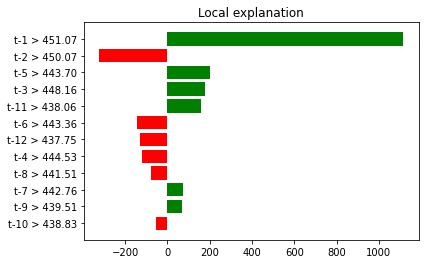

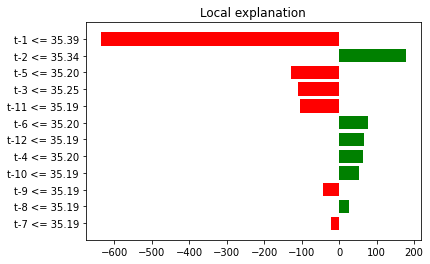

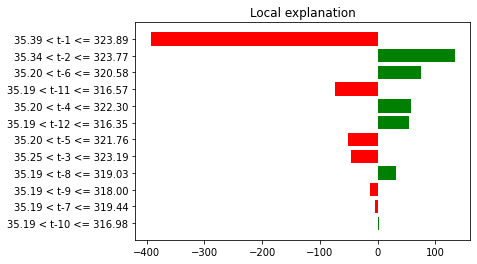

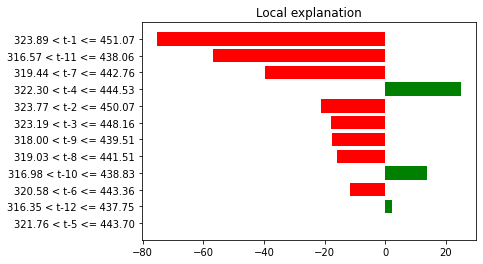

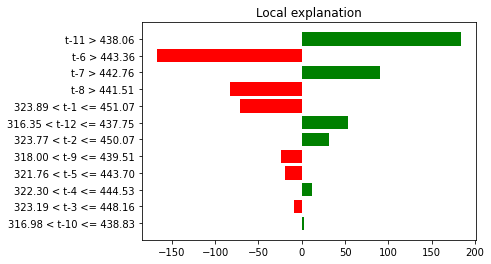

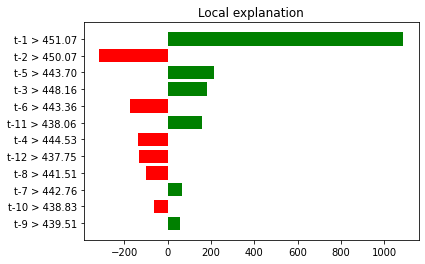

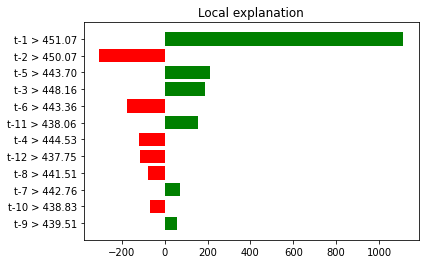

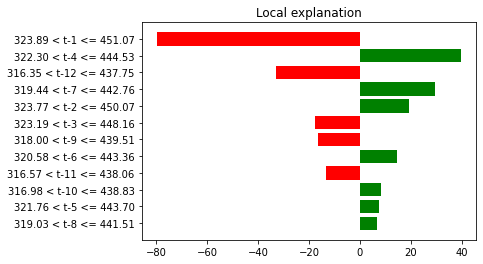

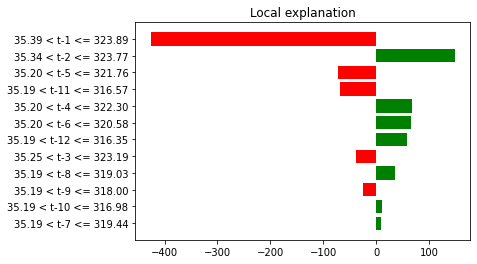

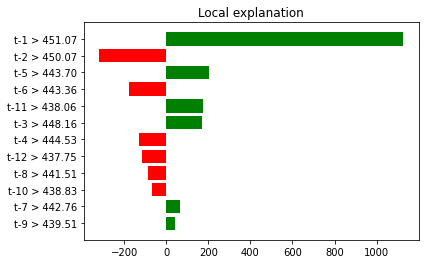

In [28]:
images = [exp.as_pyplot_figure() for exp in sp_obj.sp_explanations ]

In [29]:
exp.predicted_value

35.77034850521053

In [30]:
import shap
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=100, random_state=0)
rforest.fit(X, y)


# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X)


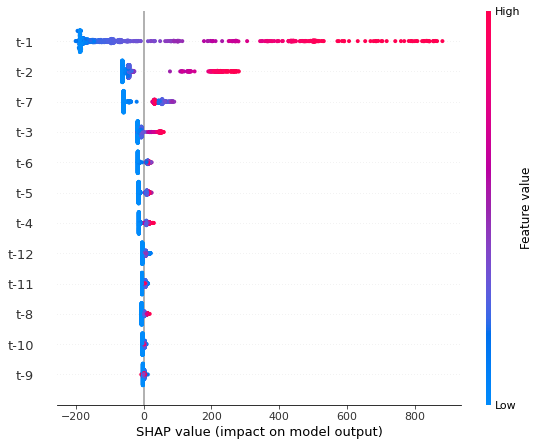

In [31]:
shap.summary_plot(shap_values, X)

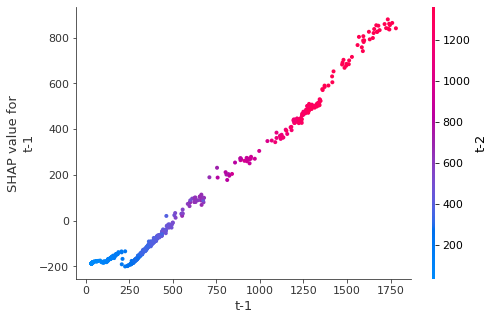

In [32]:
shap.dependence_plot("t-1", shap_values, X)

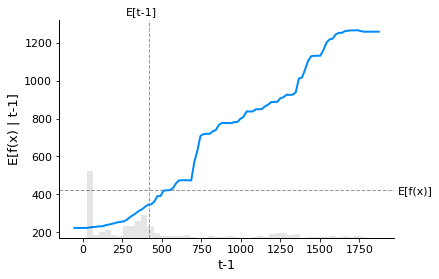

In [33]:
shap.partial_dependence_plot(
    "t-1", rforest.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)